In [0]:
#!pip install --upgrade tensorflow
#!pip install tensorflow==1.14

In [0]:
# Load necessary packages
from keras.datasets import cifar10
from keras.datasets import cifar100
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
(X_train1, y_train1), (X_test1, y_test1) = cifar100.load_data()

In [0]:
# Lets determine the dataset characteristics
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [0]:
# Now for a single image 
print(X_train[0].shape)
#X_train = np.reshape(X_train, (X_train.shape[0], -1))
#print(X_train.shape)

(32, 32, 3)


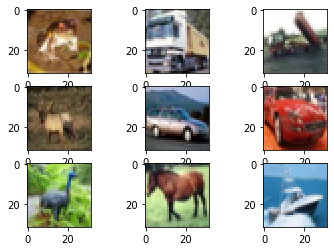

In [0]:
# create a grid of 3x3 images
for i in range(0,9):
    plt.subplot(330 + i + 1)
    img = X_train[i].transpose([0,1,2])
    plt.imshow(img)
    
# show the plot
plt.show()

In [0]:
seed = 6
np.random.seed(seed) 

# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize the inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:
# class labels shape
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [0]:
# hot encode outputs
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_classes = Y_test.shape[1]

print(Y_train.shape)
print(Y_train[0])

(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:

X_train.shape

(50000, 32, 32, 3)

In [0]:
Y_train.shape

(50000, 10)

In [0]:
X_test.shape

(10000, 32, 32, 3)

In [0]:
Y_test.shape

(10000, 10)

In [0]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import os
from random import randint
import cv2
from keras.layers import MaxPool2D,Conv2D,UpSampling2D,Flatten
from keras.layers import Dense,Input
from keras.models import Sequential
from keras.models import Model
from keras.models import *
from keras.layers import *
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.optimizers import SGD

In [0]:
# start building the model - import necessary layers
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD

def allcnn(weights=None):
    # define model type - Sequential
    model = Sequential()
    model.add(Conv2D(3, 32, 32, input_shape=(32, 32, 3)))

    # add model layers - Convolution2D, Activation, Dropout
    model.add(Conv2D(96, (3, 3), padding = 'same', input_shape=(3, 32, 32)))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding = 'valid'))

    # add GlobalAveragePooling2D layer with Softmax activation
    model.add(GlobalAveragePooling2D())
    #model.add(Activation('softmax'))
    
    # load the weights
    if weights:
        model.load_weights(weights, by_name=True)
    
    # return model
    return model


In [0]:
# define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# build model 
model = allcnn()

# define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
#print (model.summary())

# define additional training parameters
epochs = 3
batch_size = 32

# fit the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size, verbose = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (32, 32), input_shape=(32, 32, 3...)`
  


Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 13s 257us/step - loss: 5.6151 - acc: 0.1000 - val_loss: 4.8354 - val_acc: 0.1000
Epoch 2/3
50000/50000 [==============================] - 12s 230us/step - loss: 6.2103 - acc: 0.1000 - val_loss: 4.8354 - val_acc: 0.1000
Epoch 3/3
50000/50000 [==============================] - 11s 226us/step - loss: 6.2619 - acc: 0.1000 - val_loss: 4.8354 - val_acc: 0.1000


In [0]:
# define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# define weights and build model
weights = 'all_cnn_weights_0.9088_0.4994.hdf5'
model = allcnn(weights)

# define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
#print (model.summary())

# test the model with pretrained weights
scores = model.evaluate(X_test, Y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (32, 32), input_shape=(32, 32, 3...)`
  


10000/10000 [==============================] - 2s 215us/step
Accuracy: 10.67%


In [0]:
# Lets determine the dataset characteristics
print('Training Images: {}'.format(X_train1.shape))
print('Testing Images: {}'.format(X_test1.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [0]:
print(X_train1[0].shape)

(32, 32, 3)


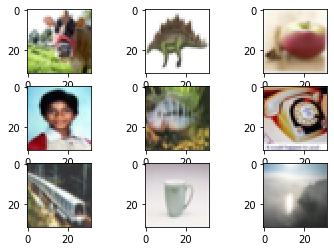

In [0]:
# create a grid of 3x3 images
for i in range(0,9):
    plt.subplot(330 + i + 1)
    img = X_train1[i].transpose([0,1,2])
    plt.imshow(img)
    
# show the plot
plt.show()

In [0]:
seed = 6
np.random.seed(seed) 

# load the data
(X_train1, y_train1), (X_test1, y_test1) = cifar10.load_data()

# normalize the inputs from 0-255 to 0.0-1.0
X_train1 = X_train.astype('float32')
X_test1 = X_test.astype('float32')
X_train1 = X_train / 255.0
X_test1 = X_test / 255.0

In [0]:

# class labels shape
print(y_train1.shape)
print(y_train1[0])

(50000, 1)
[6]


In [0]:
# hot encode outputs
Y_train1 = np_utils.to_categorical(y_train1)
Y_test1 = np_utils.to_categorical(y_test1)
num_classes = Y_test1.shape[1]

print(Y_train1.shape)
print(Y_train1[0])

(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
X_train1.shape

(50000, 32, 32, 3)

In [0]:
Y_train1.shape

(50000, 10)

In [0]:
X_test1.shape

(10000, 32, 32, 3)

In [0]:
Y_test1.shape

(10000, 10)

In [0]:
# start building the model - import necessary layers
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD

def allcnn(weights=None):
    # define model type - Sequential
    model1 = Sequential()
    model1.add(Conv2D(3, 32, 32, input_shape=(32, 32, 3)))

    # add model layers - Convolution2D, Activation, Dropout
    model1.add(Conv2D(96, (3, 3), padding = 'same', input_shape=(3, 32, 32)))
    model1.add(Activation('relu'))
    model1.add(Conv2D(96, (3, 3), padding = 'same'))
    model1.add(Activation('relu'))
    model1.add(Conv2D(96, (3, 3), padding = 'same', strides = (2,2)))
    model1.add(Dropout(0.5))

    model1.add(Conv2D(192, (3, 3), padding = 'same'))
    model1.add(Activation('relu'))
    model1.add(Conv2D(192, (3, 3), padding = 'same'))
    model1.add(Activation('relu'))
    model1.add(Conv2D(192, (3, 3), padding = 'same', strides = (2,2)))
    model1.add(Dropout(0.5))

    model1.add(Conv2D(192, (3, 3), padding = 'same'))
    model1.add(Activation('relu'))
    model1.add(Conv2D(192, (1, 1), padding = 'valid'))
    model1.add(Activation('relu'))
    model1.add(Conv2D(10, (1, 1), padding = 'valid'))

    # add GlobalAveragePooling2D layer with Softmax activation
    model1.add(GlobalAveragePooling2D())
    #model.add(Activation('softmax'))
    
    # load the weights
    if weights:
        model1.load_weights(weights, by_name=True)
    
    # return model
    return model1


In [0]:


# define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# build model 
model1 = allcnn()

# define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
#print (model.summary())

# define additional training parameters
epochs = 3
batch_size = 32

# fit the model
model1.fit(X_train1, Y_train1, validation_data=(X_test1, Y_test1), epochs=epochs, batch_size=batch_size, verbose = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (32, 32), input_shape=(32, 32, 3...)`
  


Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 13s 260us/step - loss: 11.2915 - acc: 0.1000 - val_loss: 11.2827 - val_acc: 0.1000
Epoch 2/3
50000/50000 [==============================] - 11s 219us/step - loss: 11.2827 - acc: 0.1000 - val_loss: 11.2827 - val_acc: 0.1000
Epoch 3/3
50000/50000 [==============================] - 11s 226us/step - loss: 11.2827 - acc: 0.1000 - val_loss: 11.2827 - val_acc: 0.1000


In [0]:
# define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# define weights and build model
weights = 'all_cnn_weights_0.9088_0.4994.hdf5'
model1 = allcnn(weights)

# define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
#print (model.summary())

# test the model with pretrained weights
scores = model1.evaluate(X_test, Y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (32, 32), input_shape=(32, 32, 3...)`
  


10000/10000 [==============================] - 2s 244us/step
Accuracy: 10.67%


In [0]:
import keras
print(keras.__version__)
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input
import tensorflow.keras

2.2.5


In [0]:
from keras.layers import *
model_concat = concatenate([model.output, model1.output], axis=-1)

In [0]:
#model_concat= Flatten()(model_concat)
from keras.models import Model
model_concat = Dense(1, activation='softmax')(model_concat)
model_concat = Dense(10, activation='softmax')(model_concat)
model = Model(inputs=[model1.input, model.input], outputs=model_concat)

In [0]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
conv2d_221_input (InputLayer)   (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_241_input (InputLayer)   (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_221 (Conv2D)             (None, 1, 1, 3)      9219        conv2d_221_input[0][0]           
__________________________________________________________________________________________________
conv2d_241 (Conv2D)             (None, 1, 1, 3)      9219        conv2d_241_input[0][0]           
____________________________________________________________________________________________

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
epoch=3
history = model.fit([X_train,X_train1],
                    [Y_train],
                    shuffle = True, #important since we loaded cats first, dogs second.
                    epochs=10,
                    validation_data=([X_test,X_test1], 
                                     [Y_test]))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 26s 524us/step - loss: 0.3251 - acc: 0.9000 - val_loss: 0.3251 - val_acc: 0.9000
Epoch 2/10
50000/50000 [==============================] - 23s 451us/step - loss: 0.3251 - acc: 0.9000 - val_loss: 0.3251 - val_acc: 0.9000
Epoch 3/10
50000/50000 [==============================] - 23s 453us/step - loss: 0.3251 - acc: 0.9000 - val_loss: 0.3251 - val_acc: 0.9000
Epoch 4/10
50000/50000 [==============================] - 23s 458us/step - loss: 0.3251 - acc: 0.9000 - val_loss: 0.3251 - val_acc: 0.9000
Epoch 5/10
50000/50000 [==============================] - 23s 454us/step - loss: 0.3251 - acc: 0.9000 - val_loss: 0.3251 - val_acc: 0.9000
Epoch 6/10
50000/50000 [==============================] - 23s 461us/step - loss: 0.3251 - acc: 0.9000 - val_loss: 0.3251 - val_acc: 0.9000
Epoch 7/10
50000/50000 [==============================] - 23s 451us/step - loss: 0.3251 - acc: 0.9000 - val_loss: 0.

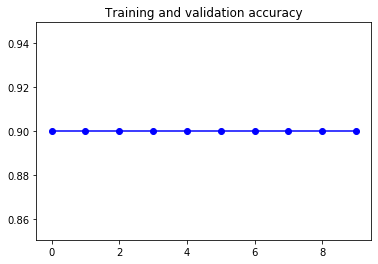

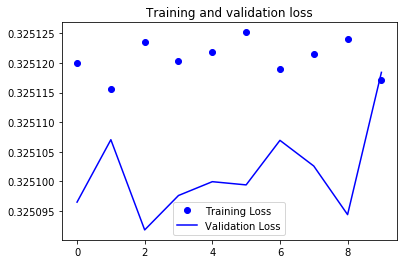

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()